In [16]:
#Dependencies
import yfinance as yf
import json, requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
import re
import time,ciso8601
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
John_Stockton_Model=tf.keras.models.load_model("John_Stockton_Model.h5")

In [5]:
nn_model1=tf.keras.models.load_model("nn_model1.h5")

In [24]:
stock = yf.Ticker("TSLA")
stock

yfinance.Ticker object <TSLA>

In [25]:
stock_df= stock.history(interval="1d", start="2019-01-01", end="2022-01-01").reset_index()

In [27]:
#Converting the dates to timestamps to make it much easier to graph
stock_timestamps=[]
for dates in stock_df["Date"]:
    stock_timestamps.append(to_timestamp(dates))
stock_df["timestamps"]=stock_timestamps
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,timestamps
0,2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0.0,0.0,1546416000
1,2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0.0,0.0,1546502400
2,2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0.0,0.0,1546588800
3,2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0.0,0.0,1546848000
4,2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0.0,0.0,1546934400
...,...,...,...,...,...,...,...,...,...
752,2021-12-27 00:00:00-05:00,357.890015,372.333344,356.906677,364.646667,71145900,0.0,0.0,1640592000
753,2021-12-28 00:00:00-05:00,369.829987,373.000000,359.473328,362.823334,60324000,0.0,0.0,1640678400
754,2021-12-29 00:00:00-05:00,366.213318,368.000000,354.713318,362.063324,56154000,0.0,0.0,1640764800
755,2021-12-30 00:00:00-05:00,353.776672,365.183319,351.049988,356.779999,47040900,0.0,0.0,1640851200


In [6]:
nasdaq_df = pd.read_csv("nasdaq500.csv")
nasdaq_df

,Symbol,Name,Sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ACN,Accenture,Information Technology
...,...,...,...
495,XYL,Xylem Inc.,Industrials
496,YHOO,Yahoo Inc.,Information Technology
497,YUM,Yum! Brands Inc,Consumer Discretionary
498,ZMH,Zimmer Holdings,Health Care


In [7]:
def to_timestamp(date):
    return int(datetime.datetime.strptime(str(date.date()), "%Y-%m-%d").timestamp())

In [8]:
def horizontal_stock_df1():
    tickers = nasdaq_df["Symbol"]
    dataframe=pd.DataFrame({})
    for ticker in tickers:
        try:
            stonk = yf.Ticker(ticker)
            stonk_df= stonk.history(interval="1d", start="2012-01-01", end="2022-01-01").reset_index()
            dict_={"Ticker":ticker}
            dates = stonk_df["Date"]
            price=stonk_df["Close"]
            for i in range(len(dates)):
                dict_[to_timestamp(dates[i])]=price[i]
            final_stock_df = stock.history(interval="1d", start="2023-01-03", end="2023-01-04").reset_index()

            if price[len(price)-1]>final_stock_df['Close'][0]:
                dict_["Final_Outcome"]=1
            else:
                dict_["Final_Outcome"]=0
            dataframe=pd.concat([dataframe,pd.DataFrame([dict_])])
        except:
            pass
    return dataframe

def horizontal_stock_df3(ticker, start, end):
    stock = yf.Ticker(ticker)
    stocks= stock.history(interval="1d", start=start, end=end).reset_index()
    dict_={"Ticker": ticker}
    dates = stocks["Date"]
    close = stocks["Close"]
    for i in range(len(dates)):
        dict_[to_timestamp(dates[i])] = close[i]
    return pd.DataFrame([dict_])

def horizontal_stock_df2(tickers):
    dataframe=pd.DataFrame({})
    dict_={}
    for ticker in tickers:
        try:
            stonk = yf.Ticker(ticker)
            stonk_df= stonk.history(interval="1d", start="2012-01-01", end="2022-01-01").reset_index()
            dates = stonk_df["Date"]
            price=stonk_df["Close"]
            for i in range(len(dates)):
                dict_[(dates[i])]=price[i]
            final_stock_df = stock.history(interval="1d", start="2023-01-03", end="2023-01-04").reset_index()

            if price[len(price)-1]>final_stock_df['Close'][0]:
                dict_["Final_Outcome"]=1
            else:
                dict_["Final_Outcome"]=0
            dataframe=pd.concat([dataframe,pd.DataFrame([dict_])])
        except:
            pass
    return dataframe.dropna()

In [21]:
def horizontal_stock_df(tickers):
    dataframe=pd.DataFrame({})
    for ticker in tickers:
        try:
            stonk = yf.Ticker(ticker)
            stonk_df= stonk.history(interval="1d", start="2012-01-01", end="2022-01-01").reset_index()
            dict_={"Ticker":ticker}
            dates = stonk_df["Date"]
            price=stonk_df["Close"]
            for i in range(len(dates)):
                dict_[dates[i]]=price[i]
            final_stock_df = stonk.history(interval="1d", start="2023-01-03", end="2023-01-04").reset_index()

            dataframe=pd.concat([dataframe,pd.DataFrame([dict_])])
        except:
            pass
    return dataframe.dropna().drop(columns=["Ticker"])

In [10]:
def mins(df, interval):
    min_dates= []
    min_values=[]
    count=0
    for i in range(0, len(df.columns)-interval, interval):
        array=np.array(df[df.columns[i:i+interval]])
        min_values.append(array.min())
        min_dates.append(to_timestamp(df.columns[interval*count+array.argmin()]))
        count+=1
    return (min_dates, min_values)

In [11]:
def maxs(df, interval):
    max_dates= []
    max_values=[]
    count=0
    for i in range(0, len(df.columns)-interval, interval):
        array=np.array(df[df.columns[i:i+interval]])
        max_values.append(array.max())
        max_dates.append(to_timestamp(df.columns[interval*count+array.argmax()]))
        count+=1
    return (max_dates, max_values)

In [29]:
max_time, max_prices = maxs(horizontal_stock_df(["TSLA"]),10)

In [30]:
min_time, min_prices = mins(horizontal_stock_df(["TSLA"]),10)

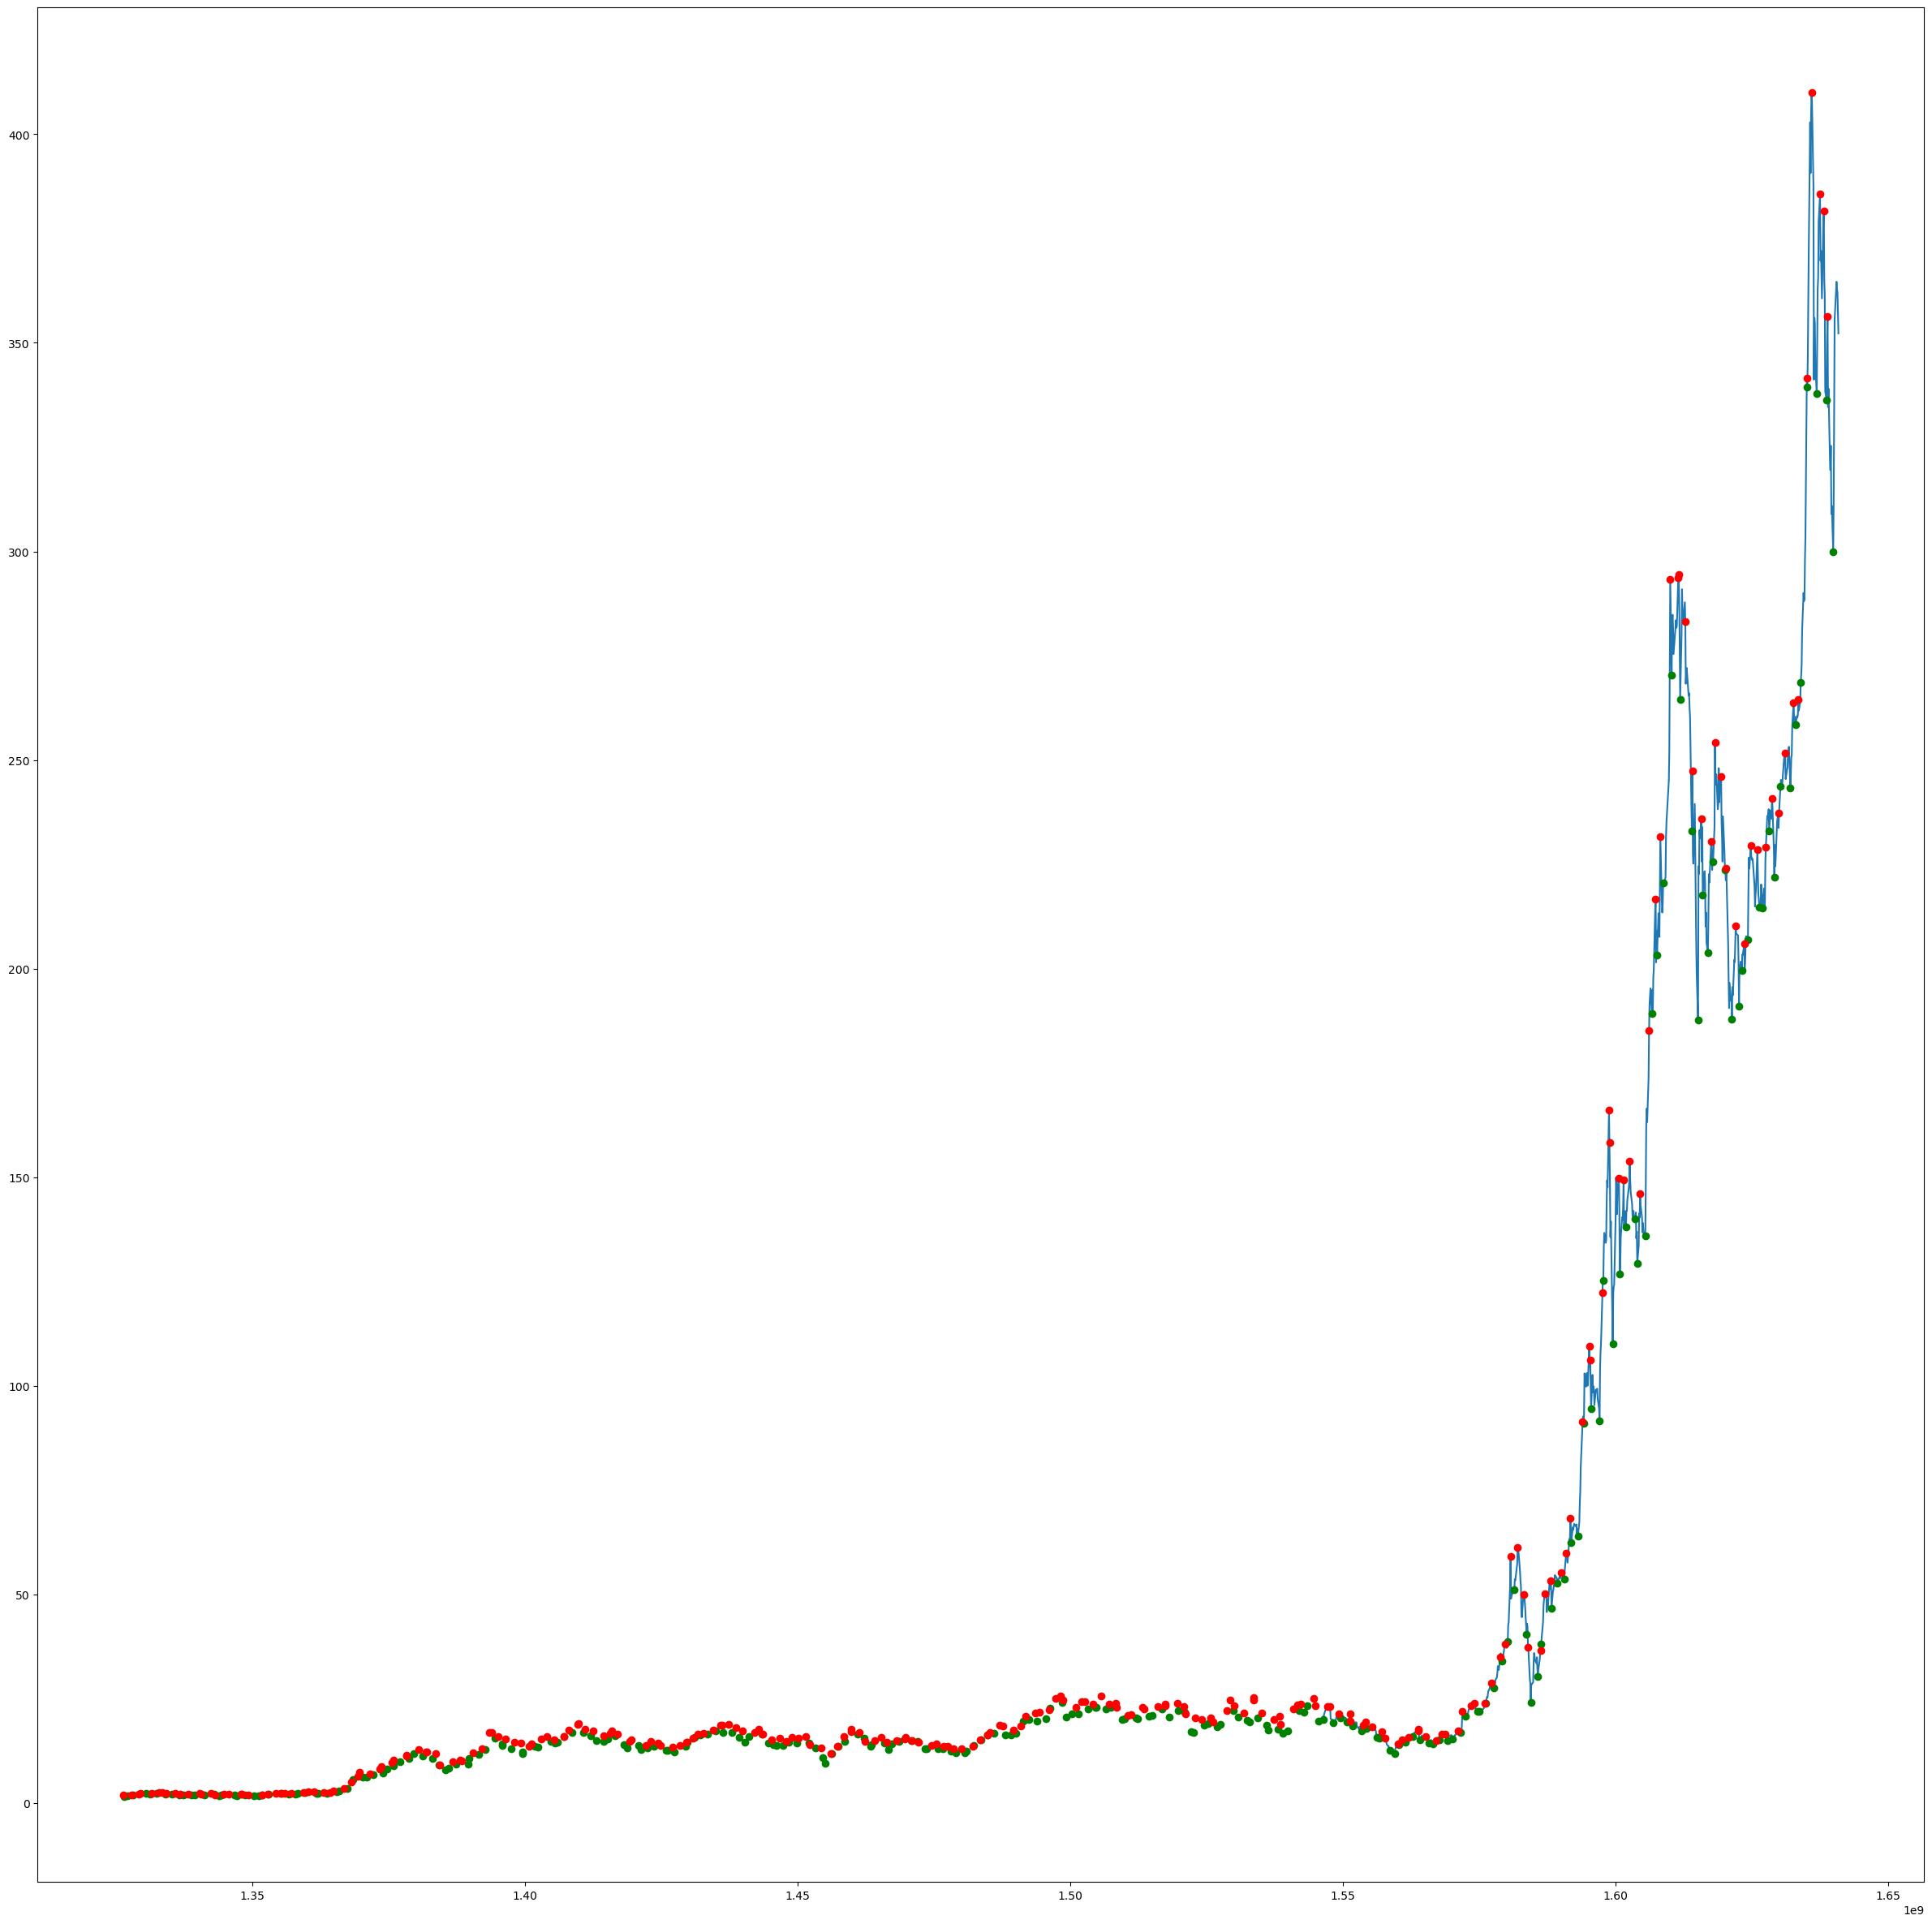

In [31]:
plt.figure(figsize=(30, 30))
plt.plot(stock_df["timestamps"], stock_df["Close"])
plt.plot(min_time, min_prices, 'o', color='g')
plt.plot(max_time, max_prices, 'o', color='r')

In [32]:
def min_max_matrix(df, interval):
    min_y = mins(df, int(1.5*interval))
    max_y = maxs(df, int(1.5*interval))
    dataframe = pd.DataFrame({})
    for i in range(len(df.columns)-interval):
        min_or_max=0
        col = list(range(interval+1))
        dict_={}
        row = np.array(df[df.columns[i:i+interval]])
        rowtime=df.columns[i:i+interval]
        row_list = row.tolist()[0]
        if to_timestamp(rowtime[len(rowtime)-1]) in min_y[0]:
            min_or_max=-1
        if to_timestamp(rowtime[len(rowtime)-1]) in max_y[0]:
            min_or_max=1
        row_list.append(min_or_max)
        for j in col:
            dict_[j] = row_list[j]
        dataframe=pd.concat([dataframe, pd.DataFrame([dict_])])
    return dataframe

In [33]:
matrix_df = min_max_matrix(horizontal_stock_df2(["TSLA"]),10)

In [34]:
matrix_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.872000,1.847333,1.808000,1.794000,1.816667,1.841333,1.882000,1.883333,1.519333,1.773333,0
0,1.847333,1.808000,1.794000,1.816667,1.841333,1.882000,1.883333,1.519333,1.773333,1.787333,0
0,1.808000,1.794000,1.816667,1.841333,1.882000,1.883333,1.519333,1.773333,1.787333,1.784000,0
0,1.794000,1.816667,1.841333,1.882000,1.883333,1.519333,1.773333,1.787333,1.784000,1.773333,0
0,1.816667,1.841333,1.882000,1.883333,1.519333,1.773333,1.787333,1.784000,1.773333,1.784667,0
...,...,...,...,...,...,...,...,...,...,...,...
0,322.136658,319.503326,325.329987,308.973328,310.856659,299.980011,312.843323,336.290009,355.666656,364.646667,0
0,319.503326,325.329987,308.973328,310.856659,299.980011,312.843323,336.290009,355.666656,364.646667,362.823334,0
0,325.329987,308.973328,310.856659,299.980011,312.843323,336.290009,355.666656,364.646667,362.823334,362.063324,0
0,308.973328,310.856659,299.980011,312.843323,336.290009,355.666656,364.646667,362.823334,362.063324,356.779999,0


In [35]:
matrix_df.loc[matrix_df[10]==1]

,0,1,2,3,4,5,6,7,8,9,10
0,1.972000,2.016667,2.076667,2.120000,2.106667,2.128667,2.172000,2.073333,2.099333,2.211333,1
0,2.120000,2.106667,2.128667,2.172000,2.073333,2.099333,2.211333,2.240000,2.278667,2.331333,1
0,2.352667,2.333333,2.354667,2.332000,2.330667,2.343333,2.293333,2.272000,2.493333,2.529333,1
0,2.343333,2.293333,2.272000,2.493333,2.529333,2.523333,2.488667,2.482667,2.438667,2.534000,1
0,2.210667,2.210667,2.129333,2.121333,2.194000,2.232667,2.222667,2.208667,2.252000,2.262667,1
...,...,...,...,...,...,...,...,...,...,...,...
0,244.523331,250.973328,251.289993,251.619995,245.423340,247.666672,248.163330,251.943329,252.330002,253.163330,1
0,258.130005,263.786682,259.186676,260.436676,258.493347,258.406677,260.510010,260.196655,260.916656,264.536682,1
0,288.089996,288.600006,298.000000,303.226654,341.619995,339.476654,345.953339,359.013336,371.333344,402.863342,1
0,303.226654,341.619995,339.476654,345.953339,359.013336,371.333344,402.863342,390.666656,404.619995,409.970001,1


In [37]:
def stockmatrices():
    returner_df = pd.DataFrame({})
    for stock in nasdaq_df["Symbol"]:
        returner_df = pd.concat([returner_df, min_max_matrix(horizontal_stock_df2([stock]),10)])
    return returner_df

In [38]:
min_max_df = stockmatrices()

ARG: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ALXN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALXN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker AGN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AGN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ABC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ABC: No timezone found, symbol may be delisted
Got error from yahoo api for ticker APC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- APC: No timezone found, symbol may be delisted
APOL: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker AVP, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AVP: No timezone found, symbol may be delis

Got error from yahoo api for ticker PKI, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PKI: No timezone found, symbol may be delisted
PCLN: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker QEP, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- QEP: No timezone found, symbol may be delisted
Got error from yahoo api for ticker RTN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- RTN: No timezone found, symbol may be delisted
Got error from yahoo api for ticker RHT, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- RHT: No timezone found, symbol may be delisted
RAI: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker RDC, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- RDC: No timezone found, symbol may be deliste

In [46]:
min_max_df =min_max_df.dropna()

In [48]:
min_max_df.loc[min_max_df[10]==1]

,0,1,2,3,4,5,6,7,8,9,10
0,57.892349,57.528362,57.878616,57.411636,57.844288,58.421124,58.922474,58.819443,58.791988,59.011730,1
0,59.547417,59.986919,60.041847,60.247860,60.131149,60.357742,60.412682,60.447014,59.842693,60.453892,1
0,59.842693,60.453892,60.426434,60.156788,60.599274,60.537067,60.564716,60.675327,60.772106,60.979538,1
0,60.509392,60.191345,58.732544,59.092079,59.949387,60.011608,60.523209,61.359776,61.442749,62.224003,1
0,61.774605,61.470425,61.235332,61.159267,61.615601,61.629425,61.152382,61.373608,61.677849,61.691654,1
...,...,...,...,...,...,...,...,...,...,...,...
0,52.704865,53.349854,52.677223,52.658798,52.631157,52.981289,52.059872,53.036575,52.870720,53.727631,1
0,51.018677,52.437656,54.695114,55.515179,57.947704,57.809502,58.730911,57.026295,58.647984,58.786190,1
0,57.533073,57.781853,57.256649,57.717361,57.256649,57.339573,58.279419,59.984028,59.495689,61.172661,1
0,60.610596,59.237694,59.716820,60.223598,60.381161,60.307014,61.066986,60.687000,61.493320,61.576733,1


In [49]:
X_min_max = min_max_df.drop(columns=[10])

In [50]:
y_min_max=min_max_df[10]

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_min_max, y_min_max, random_state=0)

# Create scaler instance
X_scaler2 = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [52]:
AON = horizontal_stock_df3("AON", start_date, end_date)

In [53]:
def highs_and_lows(ticker, start_date, end_date):
    df = horizontal_stock_df3(ticker, start_date, end_date)
    min_time=[]
    max_time=[]
    min_price=[]
    max_price=[]
    min_pred_percent=[]
    max_pred_percent=[]
    min_dict={}
    max_dict={}
    for i in range(1, len(df.columns)-11):
        prices=df[df.columns[i:i+10]]
        dates = df.columns[i:i+10]
        if(John_Stockton_Model.predict(X_scaler2.transform(prices))[0][0]<-1*(0.0)):
            min_price.append(df[df.columns[i+9]][0])
            min_time.append(df.columns[i+9])
            min_pred_percent.append(John_Stockton_Model.predict(X_scaler2.transform(prices))[0][0])
        if(John_Stockton_Model.predict(X_scaler2.transform(prices))[0][0]>(0.00)):
            max_price.append(df[df.columns[i+9]][0])
            max_time.append(df.columns[i+9])
            max_pred_percent.append(John_Stockton_Model.predict(X_scaler2.transform(prices))[0][0])
    max_dict["Max Time"] = max_time
    max_dict["Max Price"] = max_price
    max_dict["Max Prediction Percent"] = max_pred_percent
    
    min_dict["Min Time"] = min_time
    min_dict["Min Price"] = min_price
    min_dict["Min Prediction Percent"] = min_pred_percent
            
                
    return (pd.DataFrame.from_dict(min_dict), pd.DataFrame.from_dict(max_dict))    
        

In [58]:
aon_low, aon_high=highs_and_lows("AON", start_date, end_date)

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 37ms/step


In [59]:
aon_low

,Min Time,Min Price,Min Prediction Percent
0,1642147200,269.368713,-0.209145
1,1642492800,268.610107,-0.221068
2,1642579200,266.590790,-0.240939
3,1642665600,266.216461,-0.221983
4,1642752000,262.443634,-0.225623
...,...,...,...
115,1671609600,300.755890,-0.079786
116,1671696000,297.897491,-0.082885
117,1671782400,298.334167,-0.066160
118,1672128000,298.711334,-0.040180


In [60]:
aon_high

,Max Time,Max Price,Max Prediction Percent
0,1643616000,272.829041,0.043190
1,1643702400,273.194214,0.082534
2,1643788800,274.990417,0.108695
3,1643875200,272.888275,0.083133
4,1643961600,287.504822,0.205014
...,...,...,...
115,1669881600,300.795563,0.006573
116,1669968000,304.477753,0.021019
117,1670227200,306.423004,0.031138
118,1670313600,305.648865,0.033565


In [61]:
AON_T = AON.T.reset_index().drop(0)
AON_T

,index,0
1,1641196800,288.863312
2,1641283200,289.877899
3,1641369600,288.626892
4,1641456000,286.164154
5,1641542400,278.559418
...,...,...
247,1671782400,298.334167
248,1672128000,298.711334
249,1672214400,297.262299
250,1672300800,301.10321


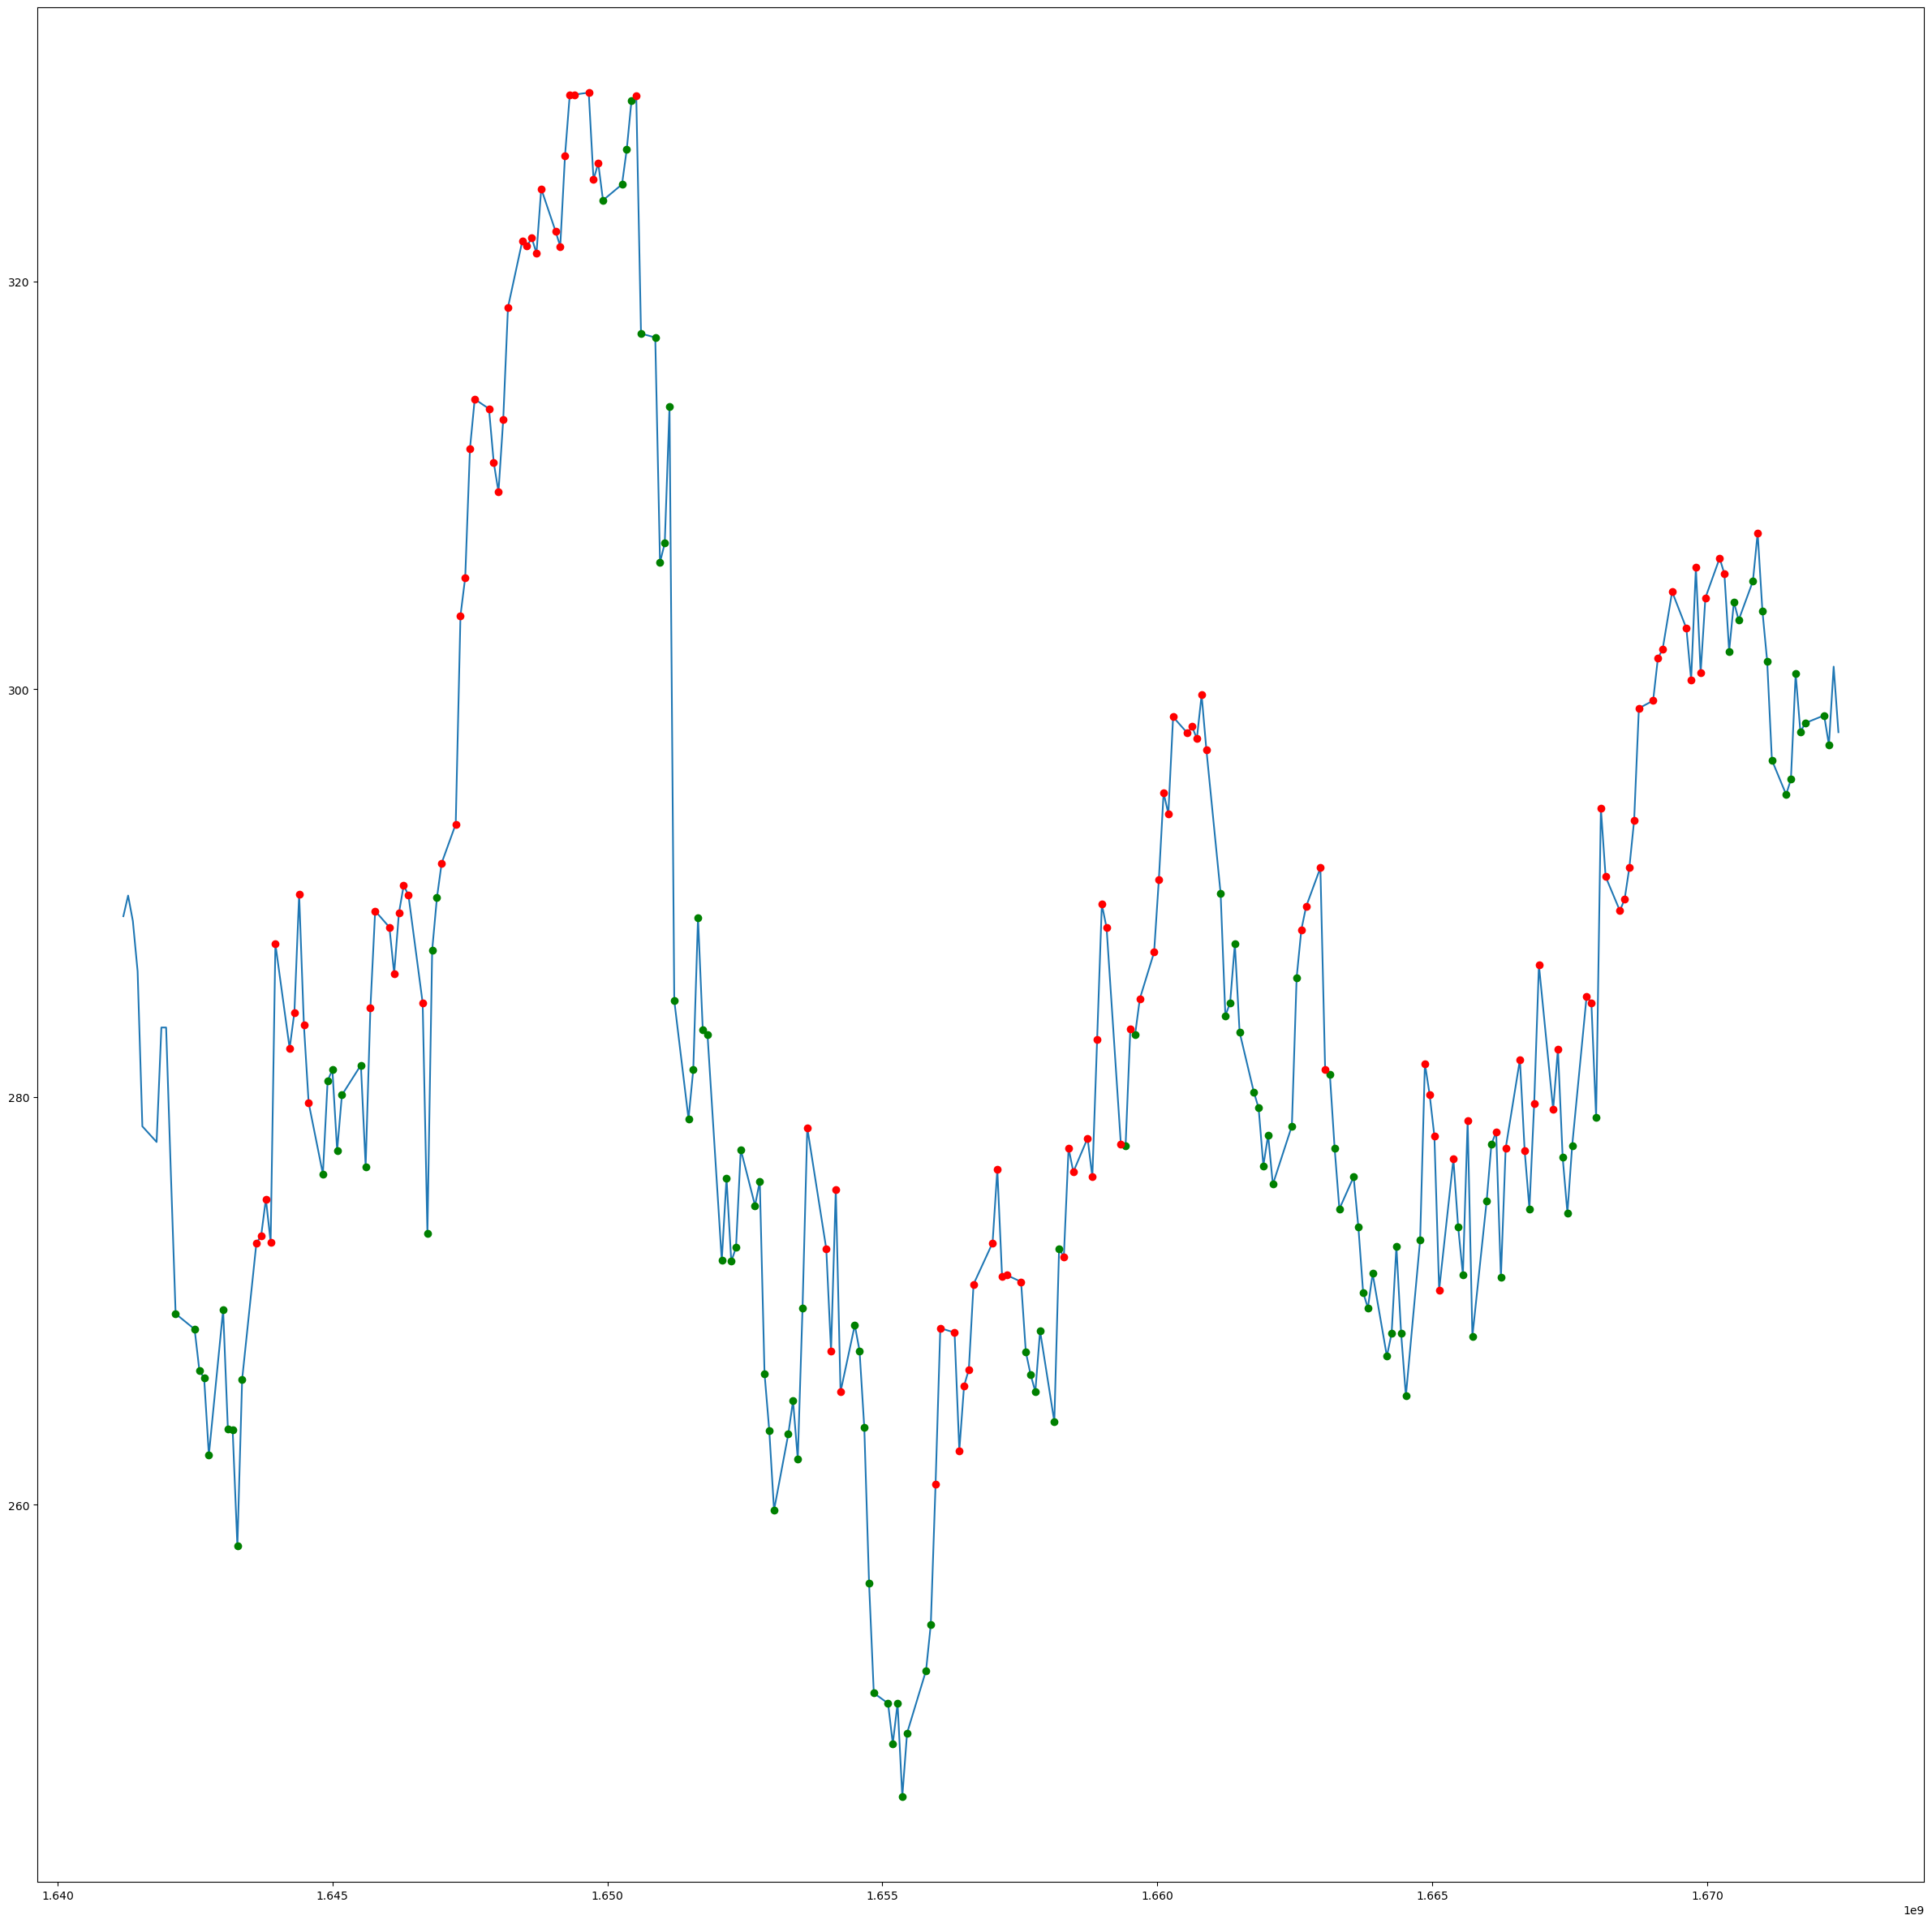

In [62]:
plt.figure(figsize=(30, 30))
plt.plot(AON_T["index"], AON_T[0])
plt.plot(aon_low['Min Time'], aon_low["Min Price"], 'o', color="g")
plt.plot(aon_high['Max Time'], aon_high["Max Price"], 'o', color="r")
plt.show()

In [63]:
def graph_extrema(ticker):
    low, high=highs_and_lows(ticker, start_date, end_date)
    data = horizontal_stock_df3(ticker, start_date, end_date).T.reset_index().drop(0)
    plt.figure(figsize=(30, 30))
    plt.plot(data["index"], data[0])
    plt.plot(low['Min Time'], low["Min Price"], 'o', color="g")
    plt.plot(high['Max Time'], high["Max Price"], 'o', color="r")
    plt.show()
    
    return low, high

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 18ms/step


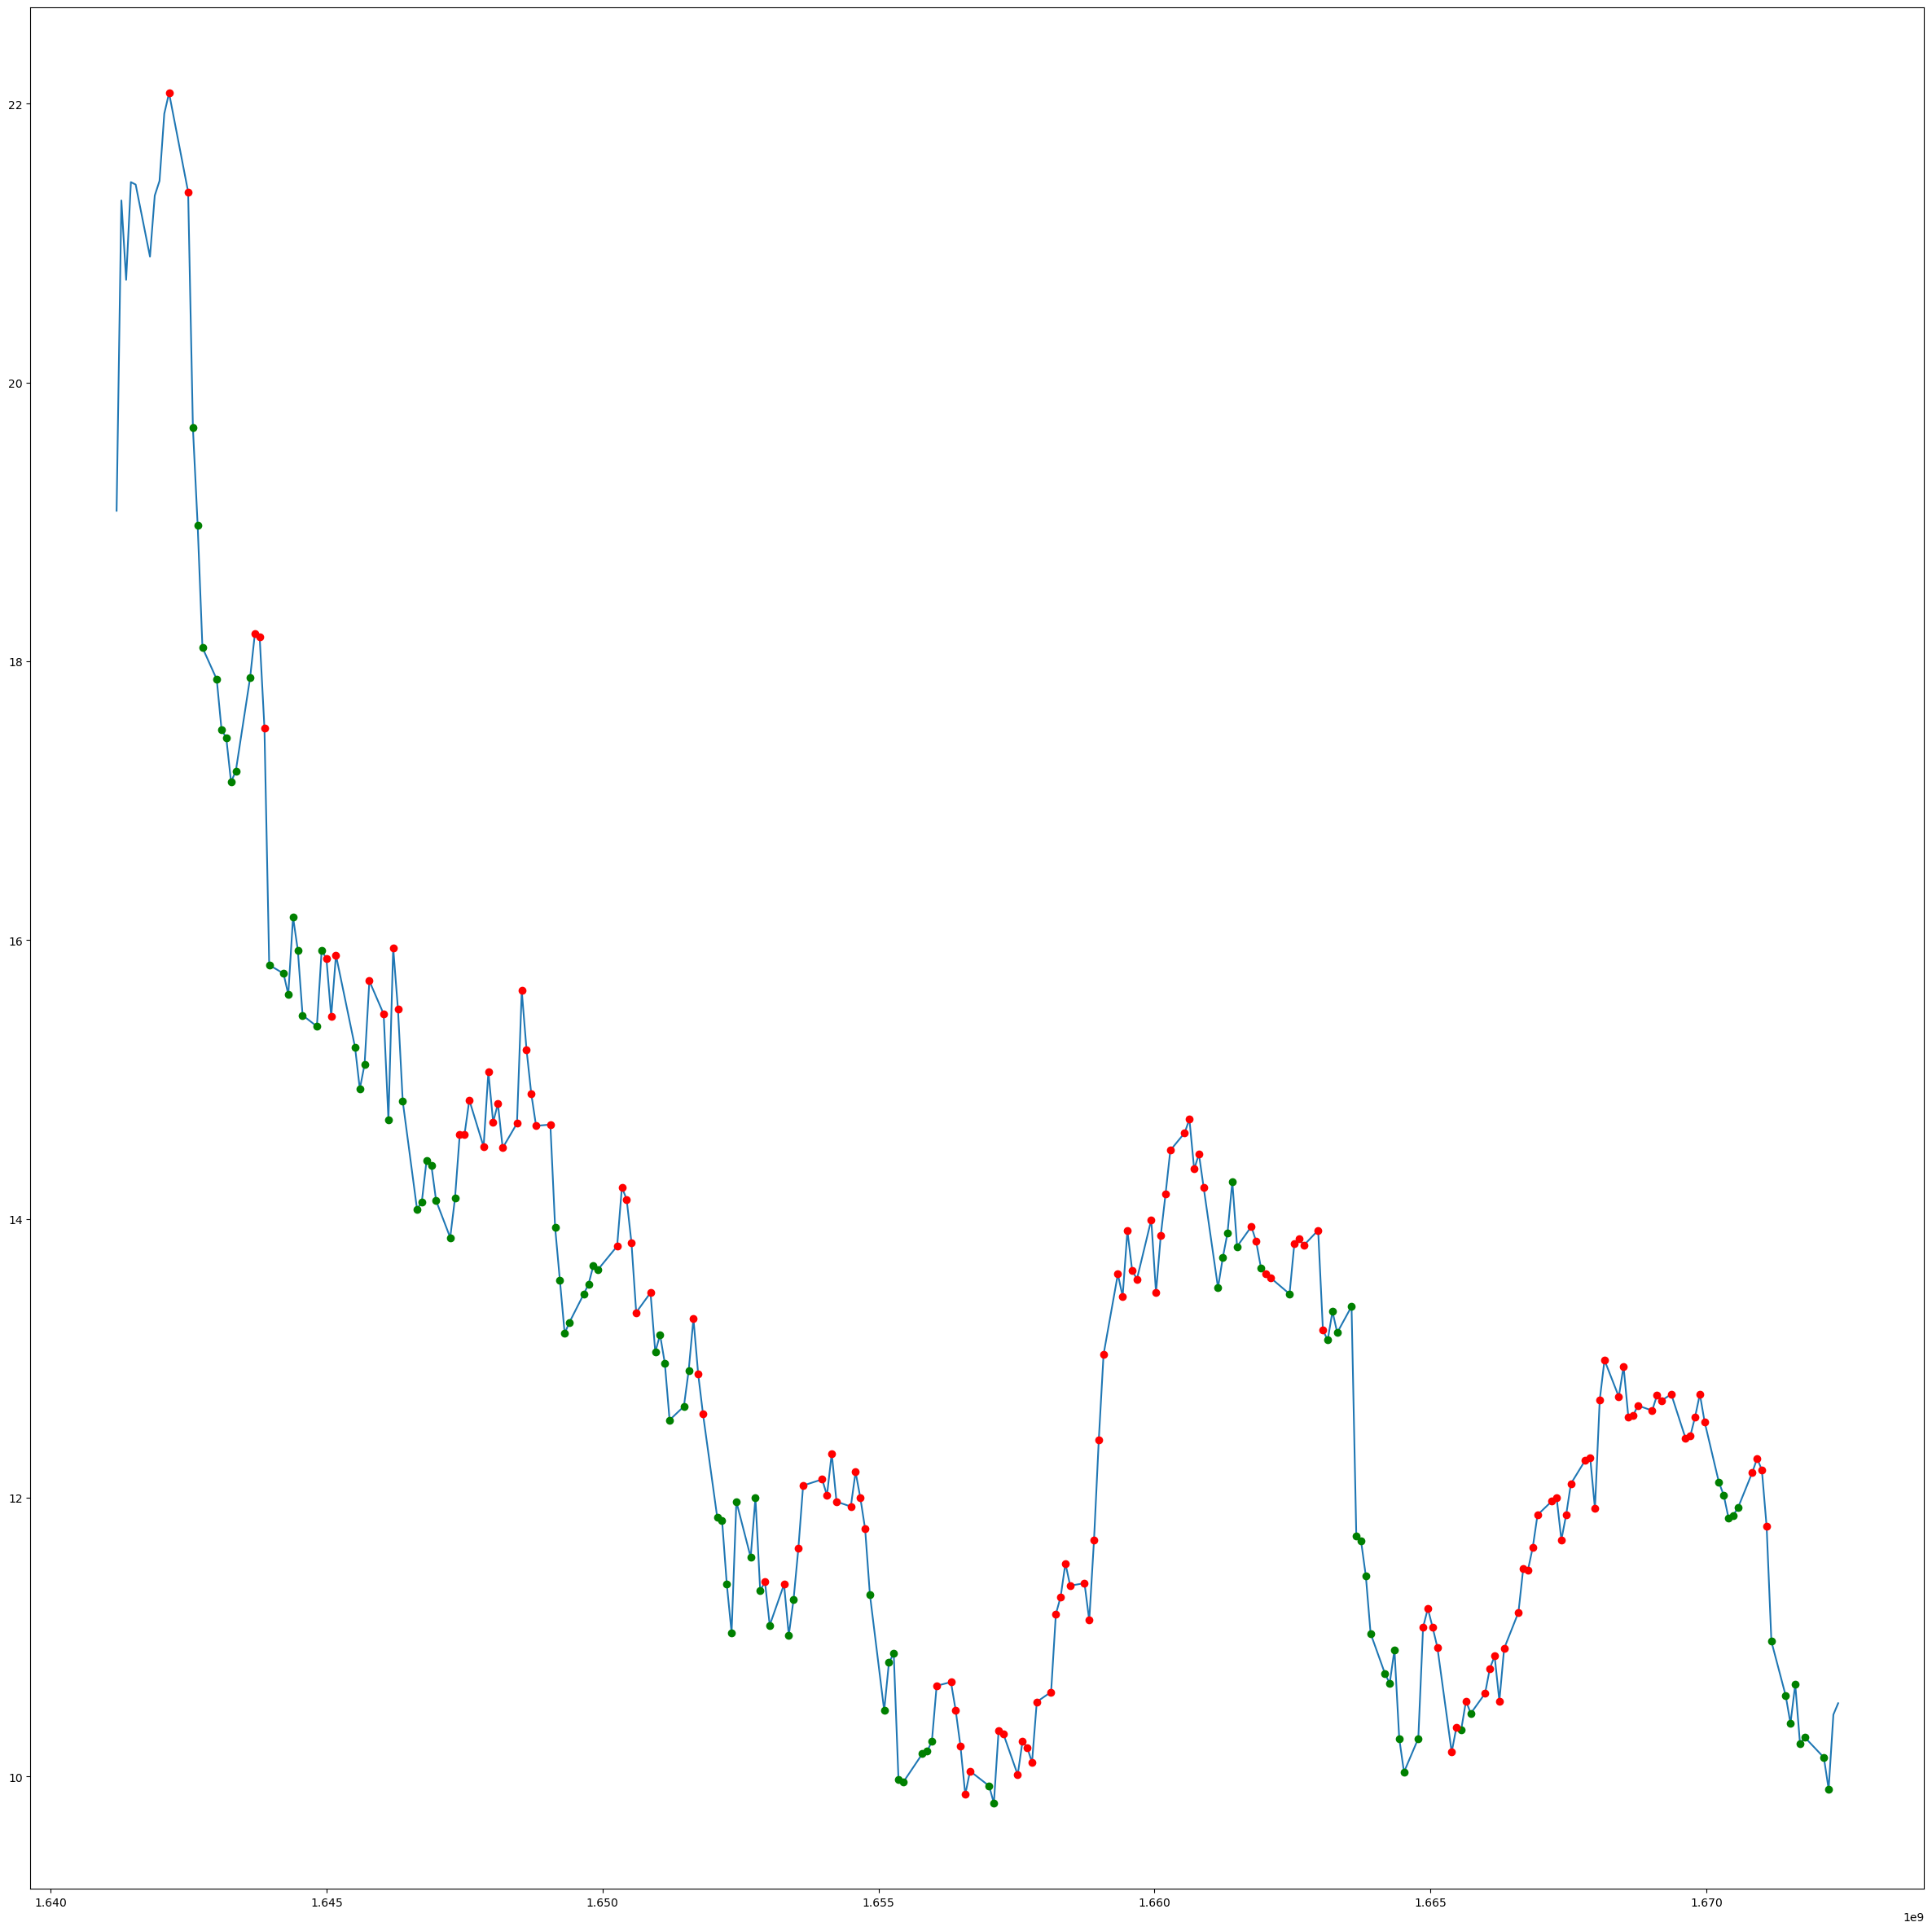

(       Min Time  Min Price  Min Prediction Percent
 0    1642579200  19.675280               -0.018164
 1    1642665600  18.974155               -0.040525
 2    1642752000  18.097752               -0.059701
 3    1643011200  17.869884               -0.068378
 4    1643097600  17.510561               -0.073524
 ..          ...        ...                     ...
 96   1671609600  10.660633               -0.024082
 97   1671696000  10.235294               -0.028570
 98   1671782400  10.280541               -0.023710
 99   1672128000  10.135746               -0.020916
 100  1672214400   9.909501               -0.018330
 
 [101 rows x 3 columns],
        Max Time  Max Price  Max Prediction Percent
 0    1642147200  22.076628                0.027765
 1    1642492800  21.366737                0.014893
 2    1643702400  18.199606                0.000594
 3    1643788800  18.173182                0.012460
 4    1643875200  17.521305                0.007663
 ..          ...        ...          

In [64]:
graph_extrema("F")

In [65]:
def buy_sell(ticker, budget):
    low, high=highs_and_lows(ticker, start_date, end_date)
    dictionary = {}
    return_dict={}
    og_budget = budget
    shares=0
    price=0
    for i in range(len(high["Max Time"])):
        dictionary[high["Max Time"][i]] = [high["Max Prediction Percent"][i], high["Max Price"][i]]
    for i in range(len(low["Min Time"])):
        dictionary[low["Min Time"][i]] = [low["Min Prediction Percent"][i], low['Min Price'][i]]
    dictionary = dict(sorted(dictionary.items()))
    
    
    for key in dictionary.items():
        price =key[1][1]
        prediction = key[1][0]
        #buy
        if prediction<0:
            shares = shares+(budget*-1*prediction)/price
            budget=budget*(1+prediction)
        #sell
        if (prediction>0 and shares>0):
            budget = budget+(shares*prediction)*price
            shares= shares*(1-prediction)
    return_dict["Ticker"]=ticker
    return_dict["Starting Budget"] = og_budget
    return_dict["Shares"] = shares
    return_dict["Amount Accrued"] = budget+shares*price
    
    return return_dict

In [66]:
 buy_sell("AON", 1000)

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


{'Ticker': 'AON',
 'Starting Budget': 1000,
 'Shares': 2.236411421962293,
 'Amount Accrued': 1088.2666924940863}

In [67]:
def buy_hold(ticker, budget):
    stock_data = horizontal_stock_df3(ticker, start_date, end_date).T.reset_index().drop(0)
    initial_shares = budget/list(stock_data[0])[0]
    final_amount = initial_shares*(list(stock_data[0])[len(stock_data)-1])
    return final_amount

In [68]:
buy_hold("AON", 1000)

1031.2408053987372

In [69]:
 buy_hold("F", 1000)

551.6382383714107

In [70]:
 buy_sell("F", 1000)

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


{'Ticker': 'F',
 'Starting Budget': 1000,
 'Shares': 31.74914101484438,
 'Amount Accrued': 843.7442262915661}

In [71]:
def buy_sell_vs_hold(tickers, budget):
    comparison_df = pd.DataFrame({})
    for ticker in tickers:
        data_dict= buy_sell(ticker, budget)
        data_dict["Buy and Hold Total"] = buy_hold(ticker, budget)
        comparison_df= pd.concat([comparison_df, pd.DataFrame([data_dict])])
    return comparison_df

In [72]:
stonkies = open("chosen_stocks.txt", "r")

In [74]:
test_stocks=[]
for line in stonkies:
    test_stocks.append(line.split("\t")[1])
test_stocks

['UNH',
 'MA',
 'HD',
 'AVGO',
 'COST',
 'TMO',
 'ACN',
 'ADBE',
 'NFLX',
 'AMGN',
 'INTU',
 'LMT',
 'BA',
 'DE',
 'SPGI',
 'ELV',
 'GS',
 'SYK',
 'BLK',
 'BKNG',
 'AMT',
 'REGN',
 'VRTX',
 'CI',
 'LRCX',
 'NOC',
 'BDX',
 'AON',
 'EQIX',
 'HUM',
 'MELI',
 'APD',
 'CHTR',
 'FDX',
 'MCO',
 'PSA',
 'ORLY',
 'ROP',
 'CMG',
 'CTAS',
 'MSCI',
 'AZO',
 'IDXX',
 'STZ']

In [75]:
comparison_df = buy_sell_vs_hold(test_stocks, 10000)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


In [78]:
comparison_df=comparison_df.rename(columns={"Amount Accrued": "John Stockton"})
comparison_df

,Ticker,Starting Budget,Shares,John Stockton,Buy and Hold Total
0,UNH,10000,8.895896,11408.466752,10690.648301
0,MA,10000,19.529323,10987.695257,9428.962183
0,HD,10000,19.635004,9949.407482,7924.005244
0,AVGO,10000,1.031336,10876.181657,8700.361779
0,COST,10000,19.449760,9452.047493,8109.159774
0,TMO,10000,9.957399,11512.887212,8557.757939
0,ACN,10000,36.017732,9626.005322,6642.281723
0,ADBE,10000,13.176499,9712.349174,5962.932149
0,NFLX,10000,27.317705,8311.690215,4936.304255
0,AMGN,10000,41.009013,11210.847232,11951.813504


<AxesSubplot:>

<Figure size 3000x3000 with 0 Axes>

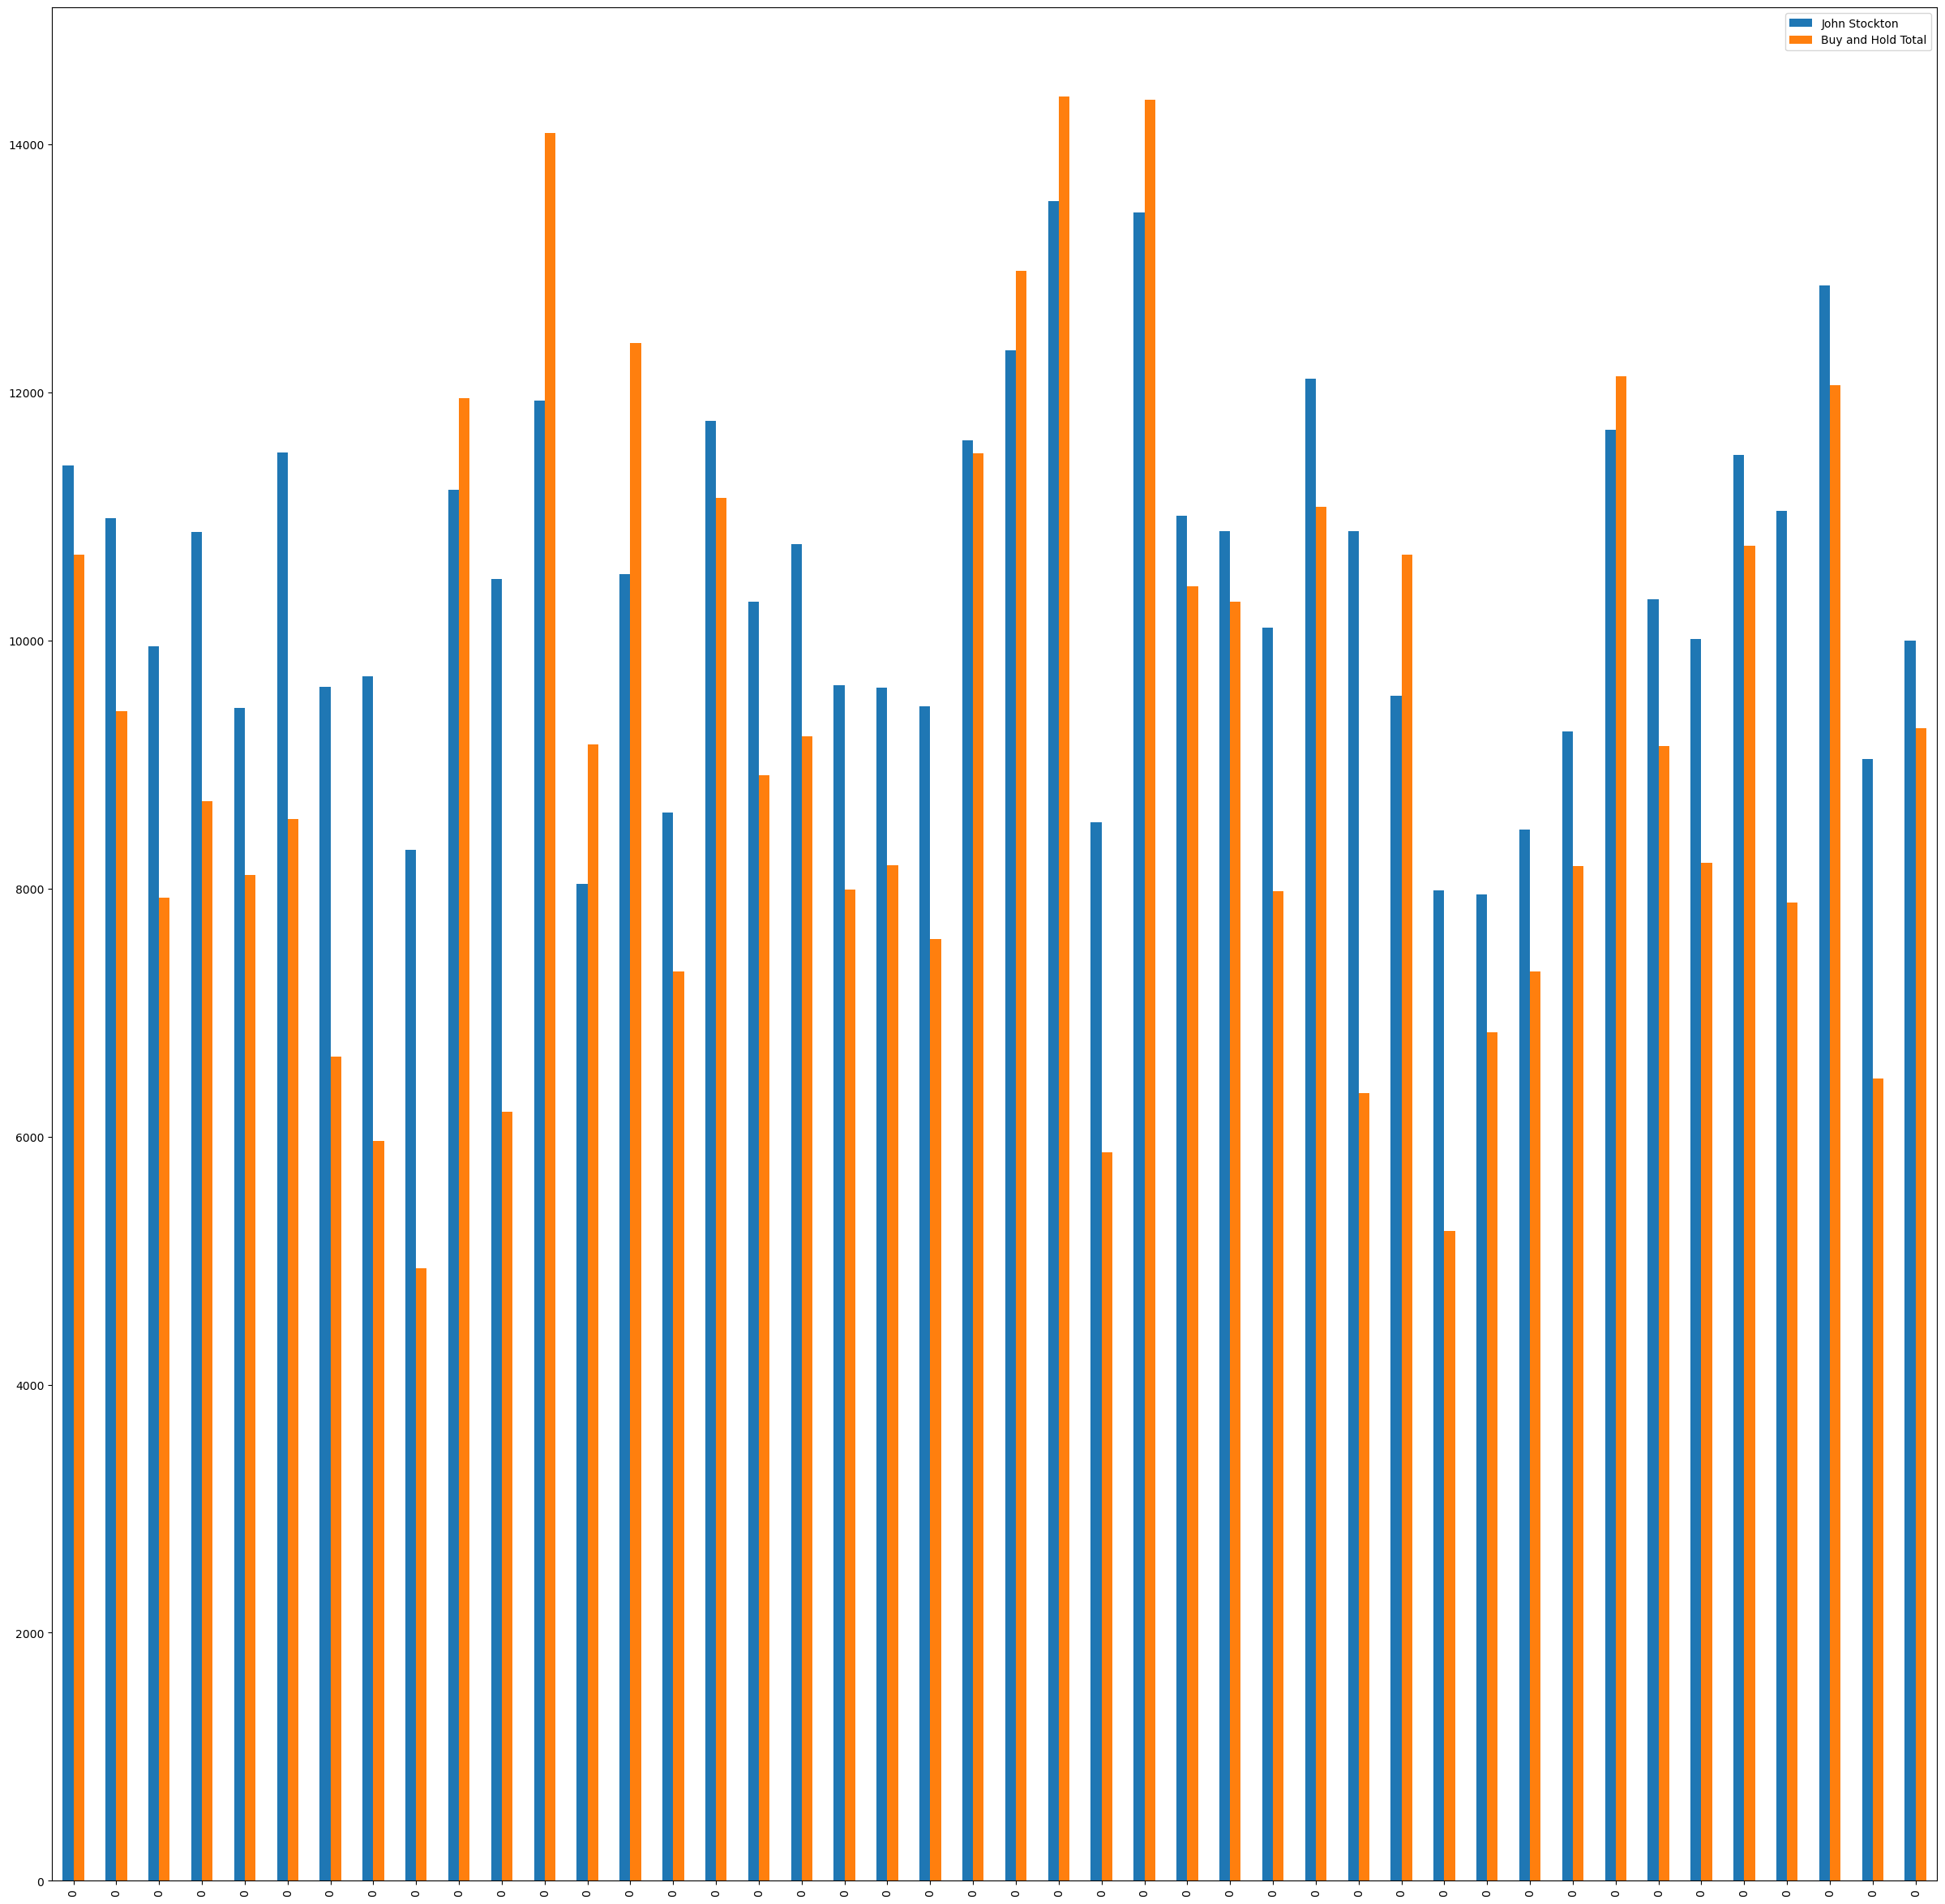

In [79]:
plt.figure(figsize=(30, 30))
comparison_df[["John Stockton","Buy and Hold Total"]].plot.bar(rot=90,figsize=(30, 30))

In [80]:
comparison_df.agg('sum')

Ticker                UNHMAHDAVGOCOSTTMOACNADBENFLXAMGNINTULMTBADESP...
Starting Budget                                                  440000
Shares                                                       723.144714
John Stockton                                             458411.572679
Buy and Hold Total                                        404624.508931
dtype: object

In [81]:
stats.ttest_ind(comparison_df["John Stockton"], comparison_df["Buy and Hold Total"])

Ttest_indResult(statistic=2.8524498547997625, pvalue=0.005432511726204387)